In the sequel we aim to visualize functionally generated portfolios.

In [58]:
import numpy as np
import pandas as pd
# import tensorflow as tf

# from keras.models import Sequential
# from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
#                         Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot
# from keras.backend import constant
# from keras import optimizers

# from keras.engine.topology import Layer
# from keras.models import Model
# from keras.layers import Input
# from keras import initializers
# from keras.constraints import max_norm
# import keras.backend as K

import matplotlib.pyplot as plt

In [180]:
p = 0.1
c = 0.5

In [306]:
n = 20
N = 250
T = 1.0
#K = 1 #number of trajectories
dBlist = [np.random.normal(0,np.sqrt(T)/np.sqrt(N),n) for i in range(N)]
vol = 0.1/np.sqrt(n)*np.random.normal(0,1,(n,n))#np.eye(n)

In [312]:
class modeltrajectory:
    def __init__(self,n,N,T,vol,p,c, dBlist):
#        self.K = K
        self.N = N
        self.n = n
        self.T = T
        self.vol = vol
        self.p = p
        self.c = c
        self.dBlist = dBlist
    def trajectory(self):
        #trajectory = [1/np.cumsum(np.ones(self.n))]
        #trajectory = [np.ones(self.n)]
        trajectory = [np.array([0.76115707, 0.6150413 , 0.3692214 , 0.22645904, 0.14483596,
                               0.29720538, 0.14574056, 0.26629337, 0.09016825, 0.0613984 ,
                               0.18594244, 0.04528323, 0.0970301 , 0.10513567, 0.07517177,
                               0.02606764, 0.05566999, 0.06828378, 0.06645625, 0.11713029])]
        #marketweights = [(1/np.cumsum(np.ones(self.n)))/np.sum(1/np.cumsum(np.ones(self.n)))]
        #marketweights = [1/self.n*np.ones(self.n)]
        marketweights = [trajectory[-1]/np.sum(trajectory[-1])]
        marketportfolio = [1.0]
        generatedportfoliodiversity = [1.]
        generatedportfolioentropy = [1.]
        rankedmarketweights = [-np.sort(-marketweights[-1])]
        equallyweightedportfolio=[1.]
        index = [1.]
        for i in range(self.N):
            #x = np.random.normal(0,np.sqrt(T)/np.sqrt(N),self.n)
            #x = np.matmul(x,self.vol)
            #y = BMtrajectory[-1]+x
            #BMtrajectory = BMtrajectory + [y]
            #trajectory = trajectory + [y**2]
            dB = np.matmul(self.dBlist[i],self.vol)    
            trajectory = trajectory + [np.abs(trajectory[-1]+self.T/self.N*(2.0*0.1**2-0.0*trajectory[-1])+2*np.sqrt(np.abs(trajectory[-1]))*dB)]
            #trajectory = trajectory + [np.abs(trajectory[-1]+self.T/self.N*(0.1*trajectory[-1])+2*trajectory[-1]*dB)]
            marketweights = marketweights + [trajectory[i+1]/np.sum(trajectory[i+1])]
            rankedmarketweights = rankedmarketweights+[-np.sort(-marketweights[i+1])]
            #marketportfolio = marketportfolio + [1/np.sum(1/np.cumsum(np.ones(self.n)))*np.sum(trajectory[i+1])]#[1/self.n*np.sum(trajectory[i+1])]
            marketportfolio = marketportfolio + [1/np.sum(trajectory[0])*np.sum(trajectory[i+1])]#[1/self.n*np.sum(trajectory[i+1])]
            helper = marketweights[i]**self.p/np.sum(marketweights[i]**self.p)
            generatedportfoliodiversity = generatedportfoliodiversity + [generatedportfoliodiversity[i]*(1+np.sum(helper*(trajectory[i+1]-trajectory[i])/trajectory[i]))]
            helper = marketweights[i]*(self.c - np.log(marketweights[i]))/np.sum(marketweights[i]*(self.c - np.log(marketweights[i])))
            generatedportfolioentropy = generatedportfolioentropy + [generatedportfolioentropy[i]*(1+np.sum(helper*(trajectory[i+1]-trajectory[i])/trajectory[i]))]
            helper = np.ones(self.n)/self.n
            equallyweightedportfolio = equallyweightedportfolio + [equallyweightedportfolio[-1]*(1+np.sum(helper*(trajectory[i+1]-trajectory[i])/trajectory[i]))]
        return trajectory, marketweights, marketportfolio, generatedportfoliodiversity, generatedportfolioentropy, rankedmarketweights, equallyweightedportfolio
                
model = modeltrajectory(n,N,T,vol,p,c,dBlist)
trajectory = model.trajectory()[0]
marketweights = model.trajectory()[1]
marketportfolio = model.trajectory()[2]
generatedportfoliodiversity = model.trajectory()[3]
generatedportfolioentropy = model.trajectory()[4]
rankedmarketweights = model.trajectory()[5]
equallyweightedportfolio = model.trajectory()[6]

In [313]:
trajectory[-1]

array([1.022335  , 0.57557644, 0.31652658, 0.24517267, 0.22258144,
       0.38174621, 0.13971535, 0.28838757, 0.05972467, 0.03516232,
       0.14007298, 0.08595659, 0.10533802, 0.07034269, 0.1833822 ,
       0.03258313, 0.07260209, 0.10386365, 0.11119237, 0.07677369])

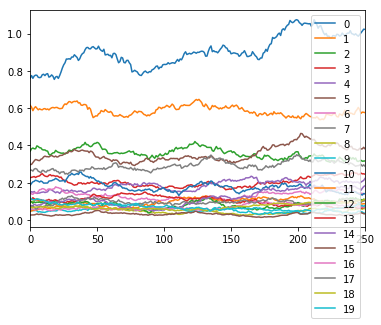

In [314]:
dftrajectory=pd.DataFrame(trajectory)
dftrajectory.plot()
plt.show()

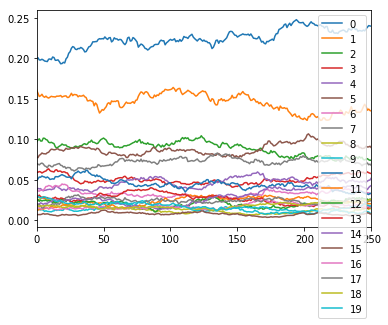

In [315]:
dfmarketweights=pd.DataFrame(marketweights)
dfmarketweights.plot()
plt.show()

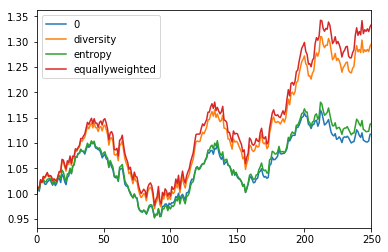

In [316]:
dfportfolios=pd.DataFrame(np.array(marketportfolio))
dfportfolios['diversity']=np.array(generatedportfoliodiversity).tolist()
dfportfolios['entropy']=np.array(generatedportfolioentropy).tolist()
dfportfolios['equallyweighted']=np.array(equallyweightedportfolio).tolist()
dfportfolios.plot()
plt.show()

In [317]:
K = 500

mpf=[]
dpf=[]
epf=[]
eepf=[]

for l in range(K):
    dBlist = [np.random.normal(0,np.sqrt(T)/np.sqrt(N),n) for i in range(N)]
    model = modeltrajectory(n,N,T,vol,p,c,dBlist)
    marketportfolio = model.trajectory()[2]
    generatedportfoliodiversity = model.trajectory()[3]
    generatedportfolioentropy = model.trajectory()[4]
    mpf = mpf + [marketportfolio[-1]]
    dpf = dpf + [generatedportfoliodiversity[-1]-marketportfolio[-1]]
    epf = epf + [generatedportfolioentropy[-1]-marketportfolio[-1]]
    eepf = eepf + [equallyweightedportfolio[-1]-marketportfolio[-1]]

In [318]:
dfpf=pd.DataFrame(mpf)
dfpf['diversity']=np.array(dpf).tolist()
dfpf['entropy']=np.array(epf).tolist()
dfpf['equallyweighted']=np.array(eepf).tolist()
dfpf

0  diversity   entropy  equallyweighted
0    1.173838   0.096167  0.016528         0.159766
1    1.306378   0.341359  0.081607         0.027226
2    0.988684   0.201706  0.030802         0.344920
3    1.197379   0.259830  0.048195         0.136226
4    0.987704   0.259562  0.039772         0.345900
5    1.021571   0.173224  0.024432         0.312034
6    1.100554   0.220099  0.054563         0.233050
7    0.983995   0.610554  0.040534         0.349609
8    1.113492   0.194992  0.043599         0.220112
9    1.181650   0.368189  0.071781         0.151955
10   1.076069   0.555603 -0.019649         0.257535
11   1.166174   0.077224  0.017451         0.167431
12   1.212959   0.210487  0.058536         0.120646
13   1.272189   0.256990  0.045732         0.061415
14   1.233280   0.219336  0.042087         0.100324
15   1.251051   0.267250  0.050123         0.082554
16   1.099758   0.298398  0.057340         0.233847
17   1.294036   0.256419  0.057291         0.039569
18   1.251263   2.549143  0.015392         0.082341
19   1.158134   0.284258  0.069500         0.175470
20   0.911935   0.193538  0.030087         0.421669
21   1.074674   0.287486  0.062115         0.258930
22   1.145092   0.226774  0.055627         0.188513
23   1.245199   0.141935  0.022677         0.088405
24   1.008309   0.186942  0.033142         0.325295
25   1.140340   0.250312  0.032727         0.193264
26   1.404601   0.116107  0.023266        -0.070997
27   1.140904   0.202590  0.043720         0.192700
28   1.286259   0.271038  0.063570         0.047345
29   1.232226   0.296391  0.066253         0.101378
..        ...        ...       ...              ...
470  1.036578   0.142793  0.003536         0.297026
471  1.222759   0.206727  0.036704         0.110846
472  1.455548   0.129772  0.030478        -0.121943
473  0.870198   0.039135  0.019928         0.463407
474  1.109853   0.199734  0.032342         0.223751
475  1.156791   1.423641  0.033982         0.176813
476  1.290993   0.147669  0.030688         0.042611
477  1.150186   0.199739  0.038018         0.183418
478  1.154007   0.168307  0.045912         0.179598
479  1.186896   0.264253  0.066407         0.146709
480  0.895194   0.079426  0.002748         0.438411
481  1.118853   0.191680  0.050363         0.214751
482  1.068025   0.270607  0.048410         0.265579
483  1.285340   0.380976  0.045165         0.048264
484  1.057146   0.396803  0.023257         0.276458
485  1.074809   0.189438  0.042698         0.258796
486  0.903245   0.201316  0.043028         0.430359
487  0.984237   0.257731  0.039133         0.349367
488  1.125481   0.093672  0.021415         0.208124
489  1.015381   0.135450  0.019598         0.318223
490  1.061356   0.242897  0.022984         0.272248
491  1.038544   0.105211  0.006312         0.295061
492  1.359632   0.254943  0.042479        -0.026027
493  1.163874   0.207493  0.040266         0.169731
494  1.109066   0.092492  0.003139         0.224539
495  0.924572   0.105929  0.019186         0.409032
496  1.077244   0.178694  0.043242         0.256361
497  1.081284   0.270212  0.050831         0.252321
498  1.126080   0.112923  0.005163         0.207524
499  0.870190   0.598603  0.011079         0.463414

[500 rows x 4 columns]

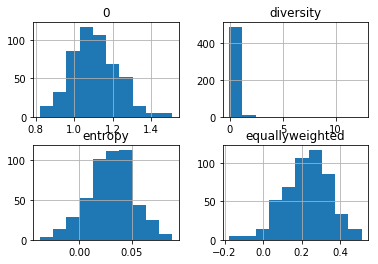

In [319]:
dfpf.hist()
plt.show()

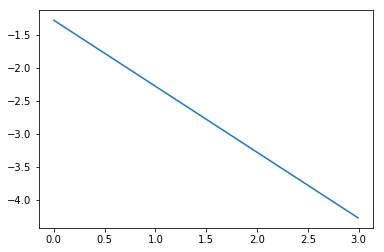

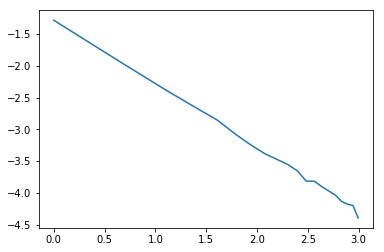

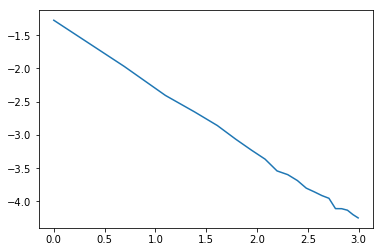

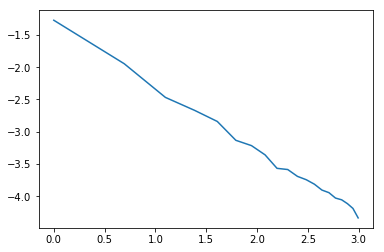

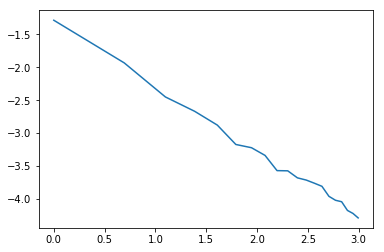

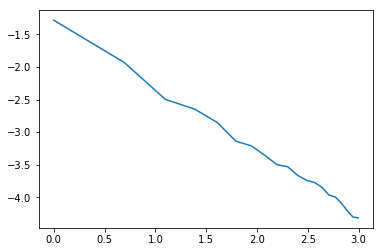

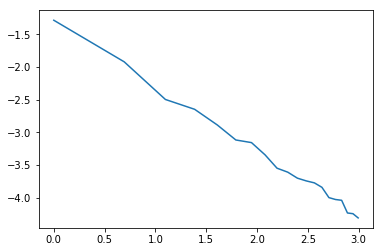

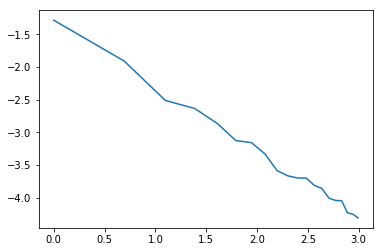

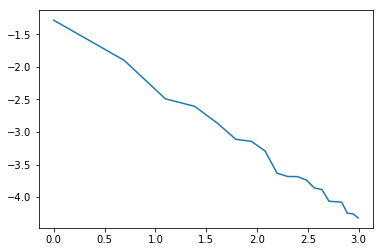

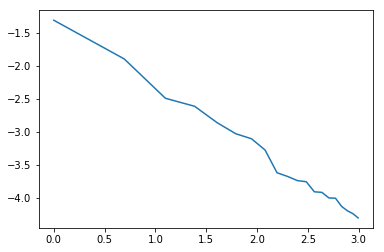

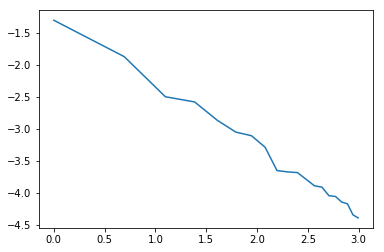

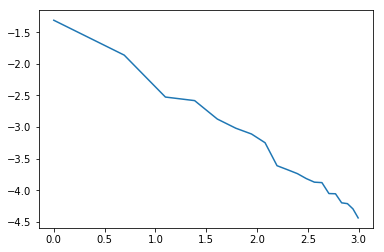

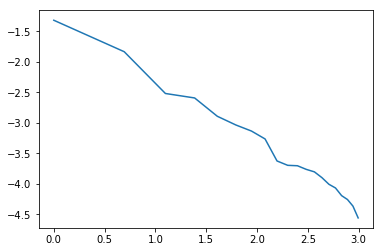

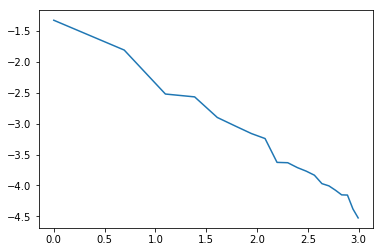

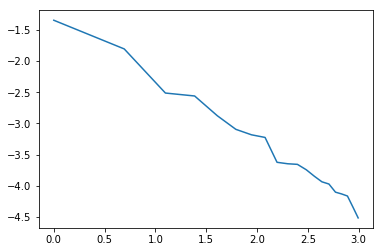

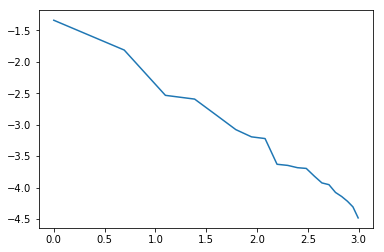

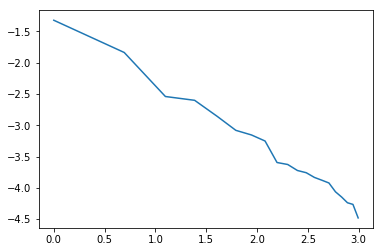

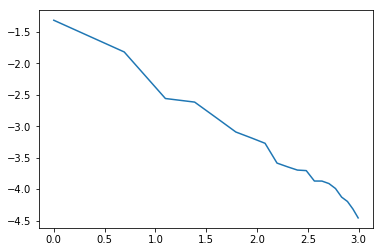

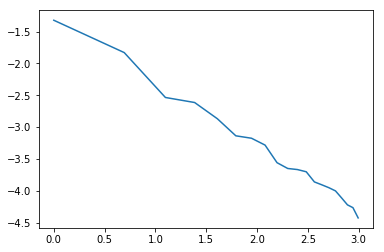

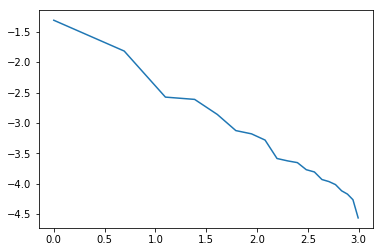

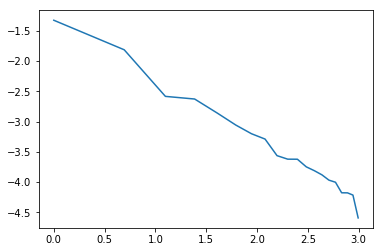

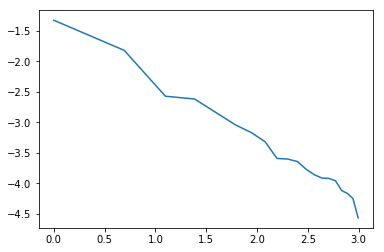

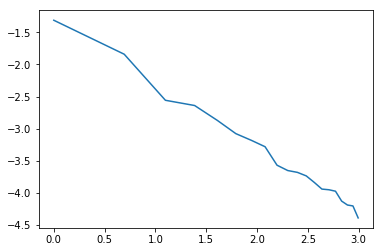

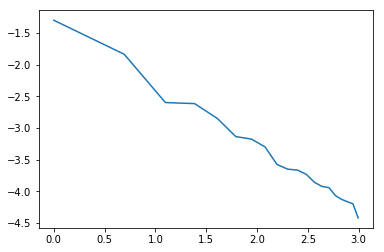

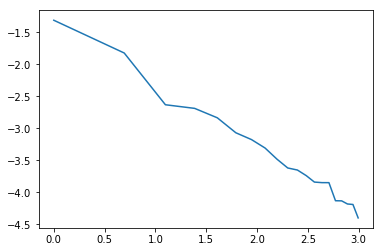

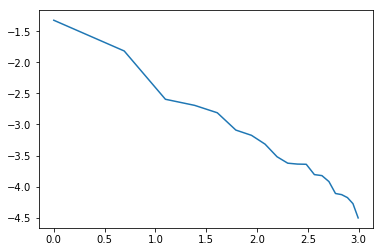

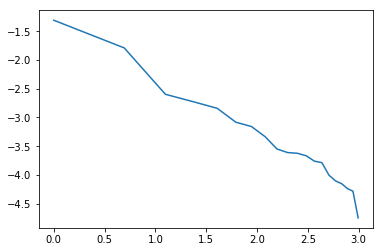

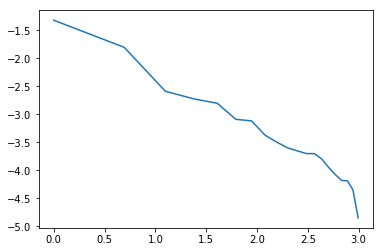

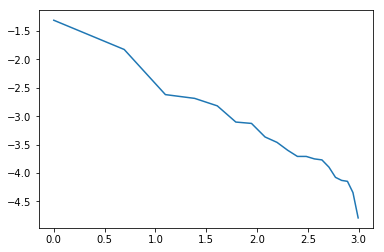

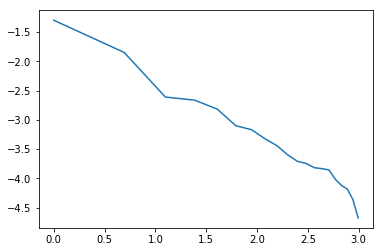

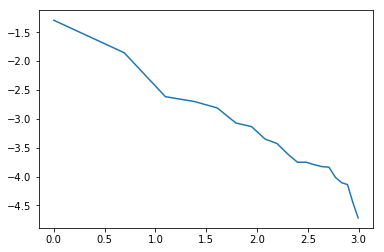

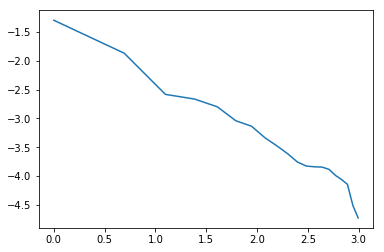

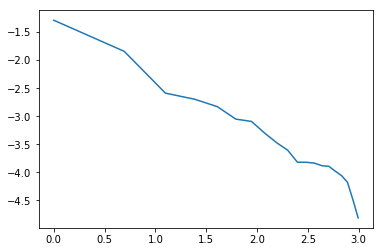

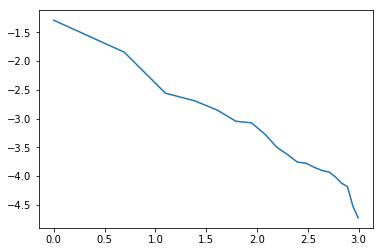

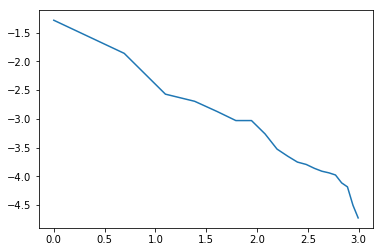

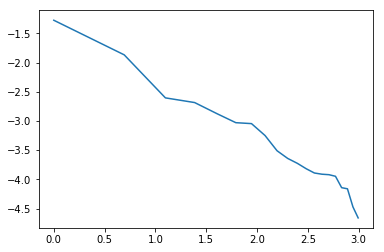

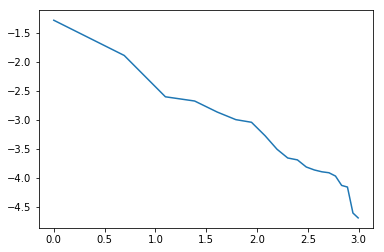

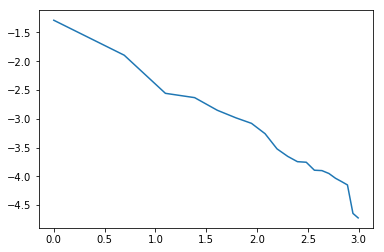

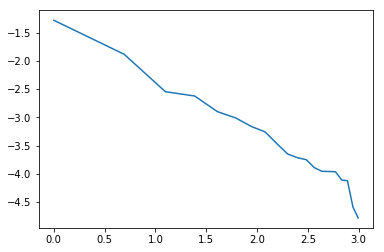

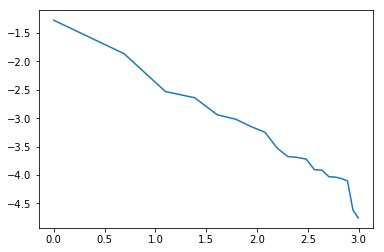

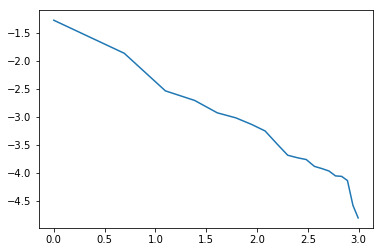

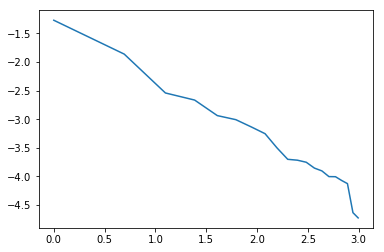

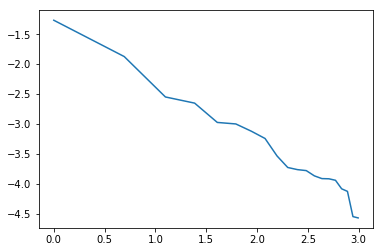

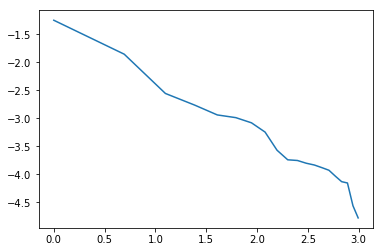

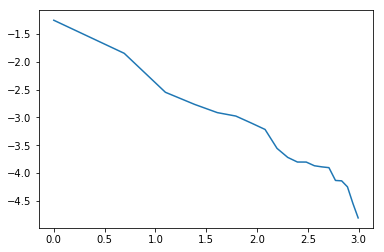

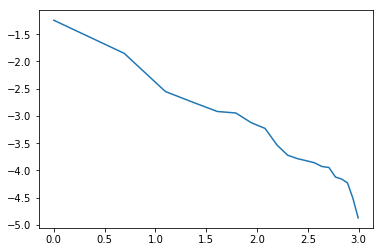

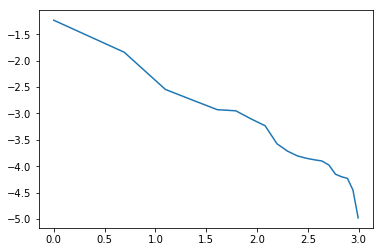

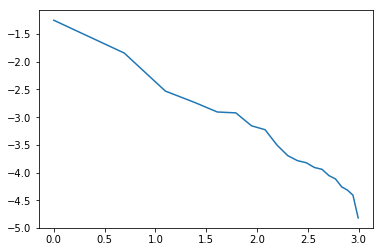

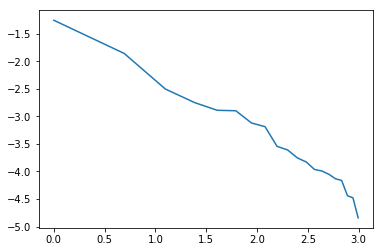

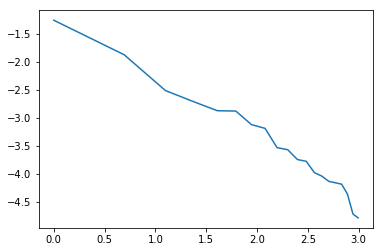

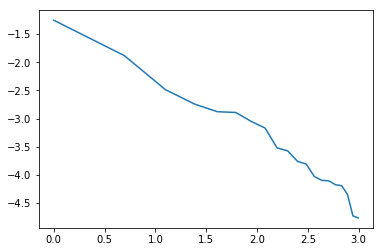

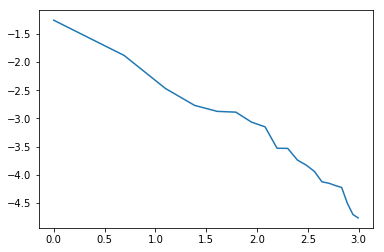

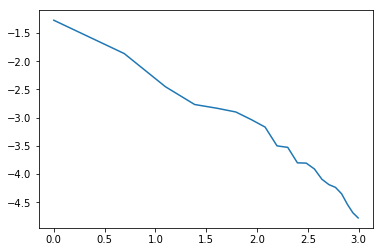

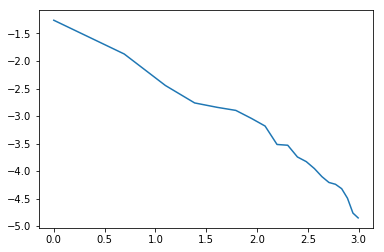

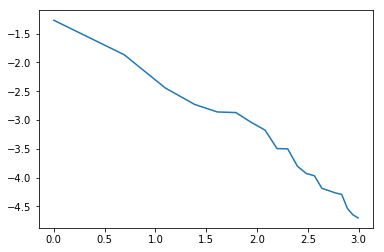

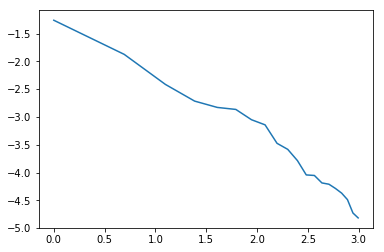

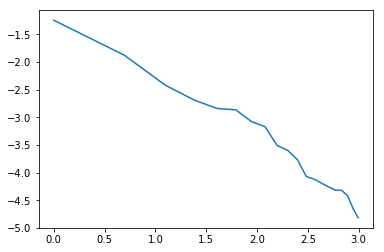

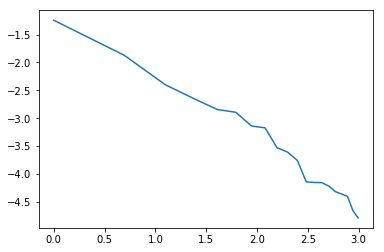

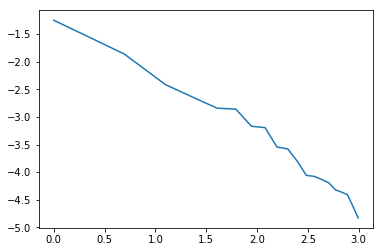

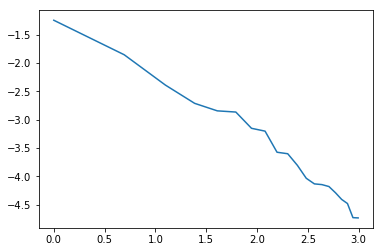

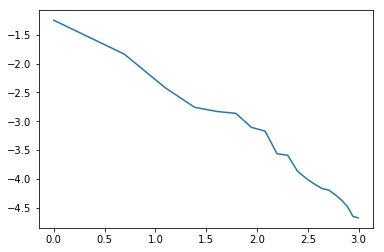

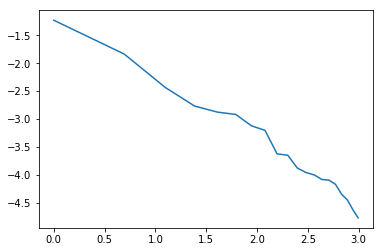

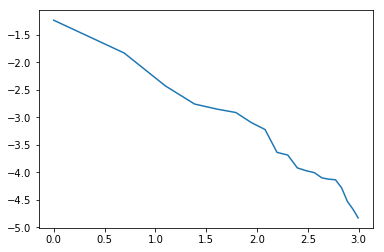

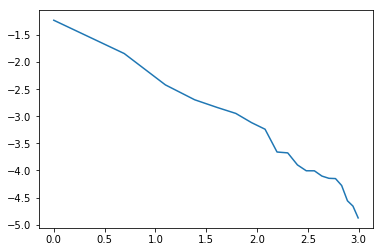

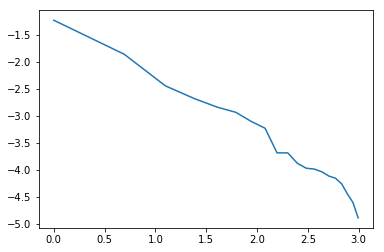

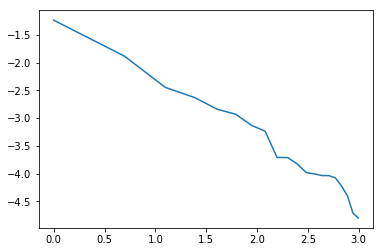

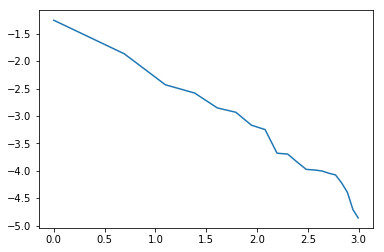

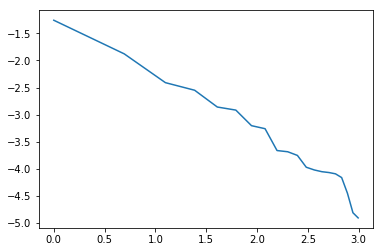

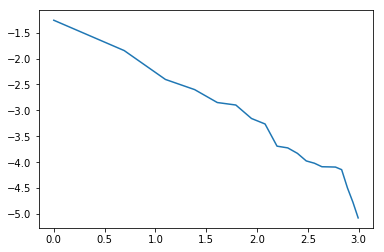

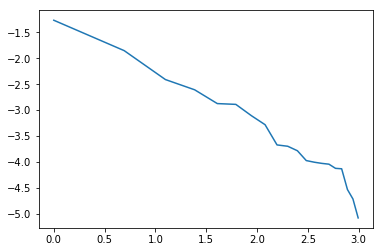

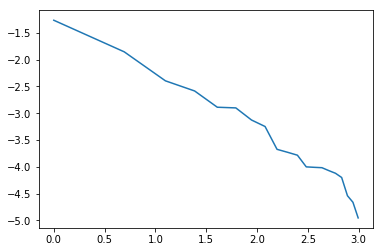

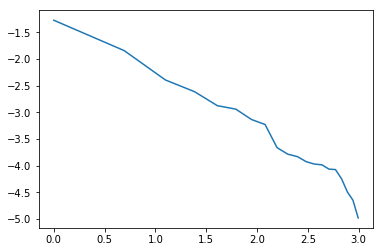

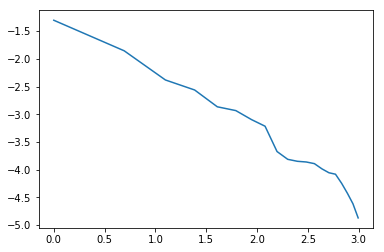

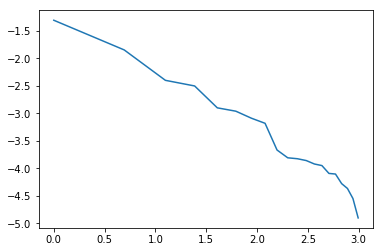

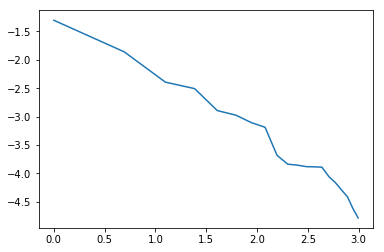

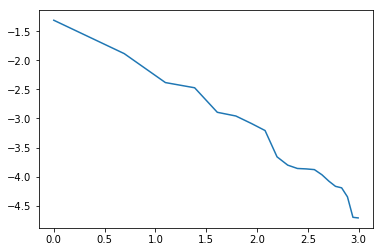

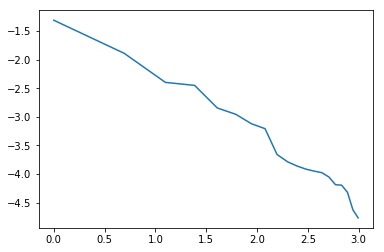

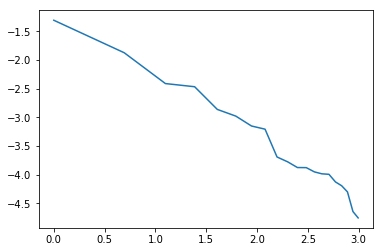

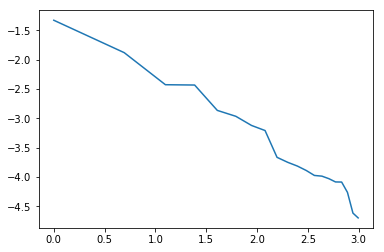

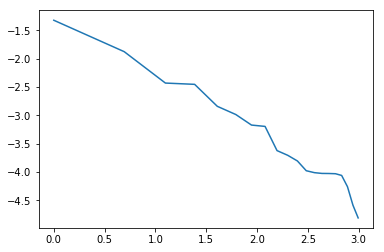

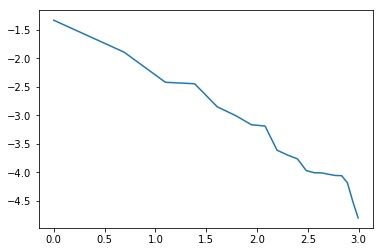

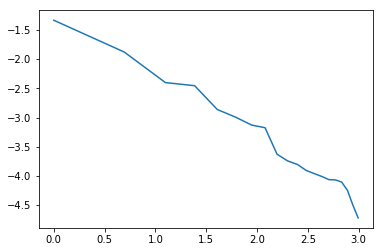

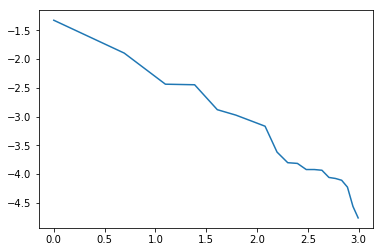

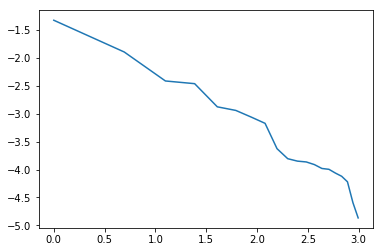

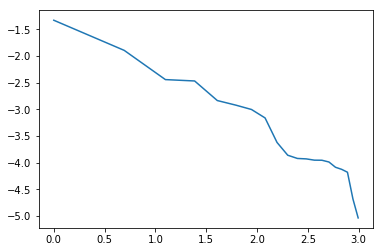

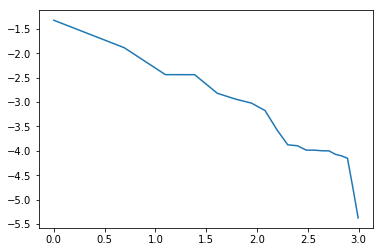

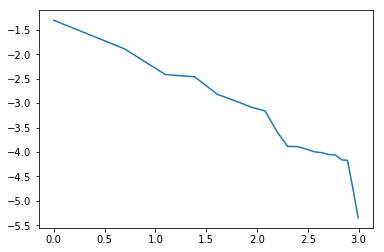

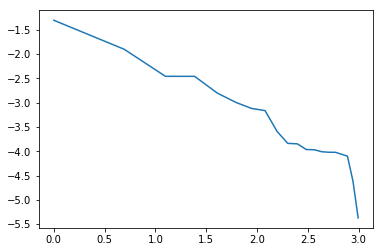

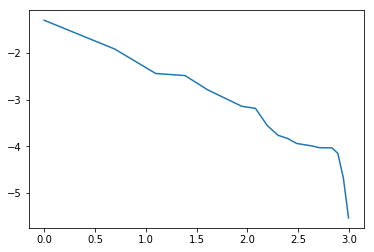

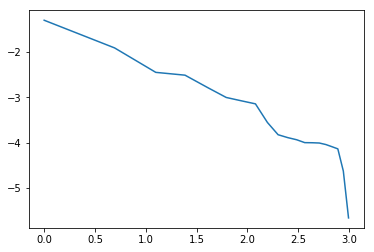

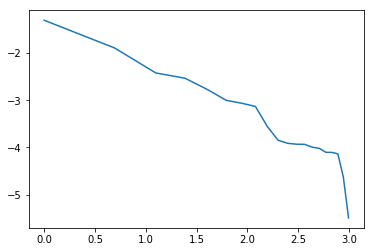

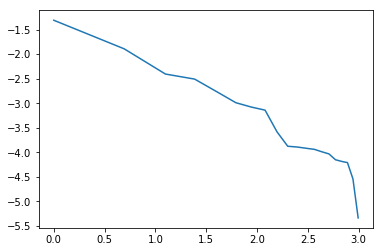

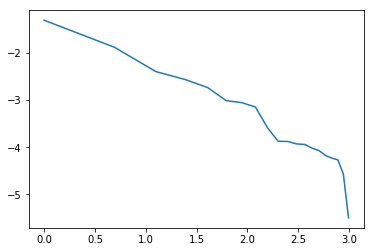

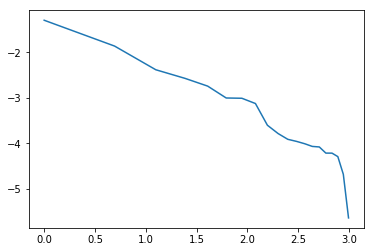

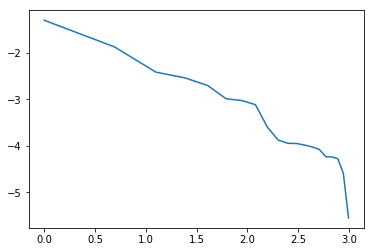

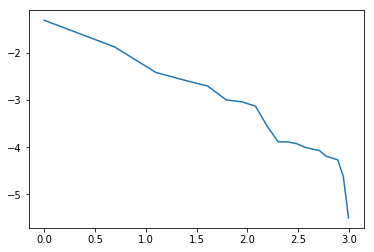

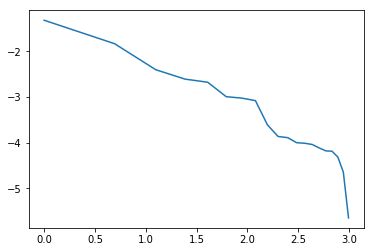

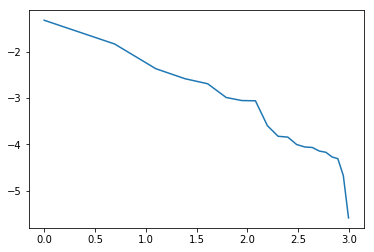

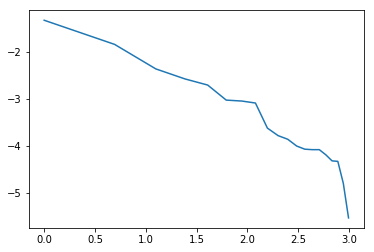

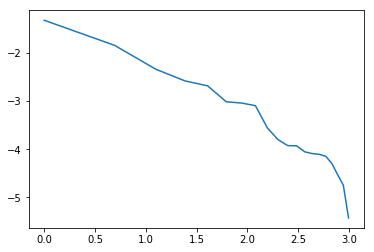

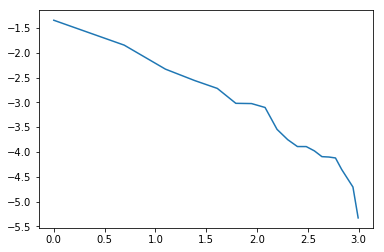

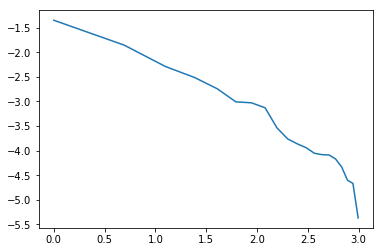

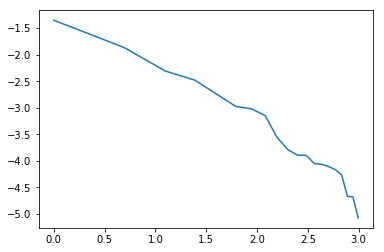

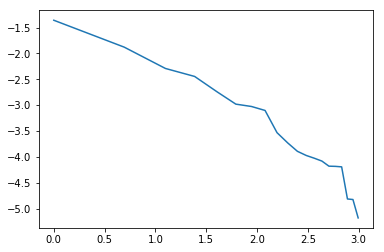

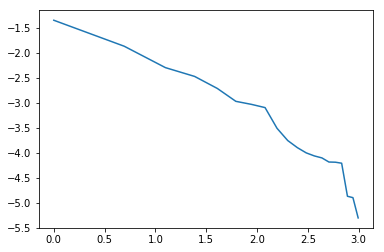

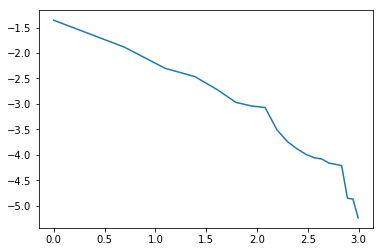

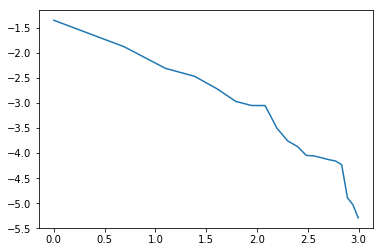

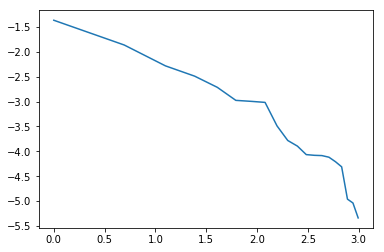

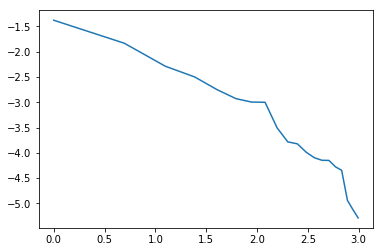

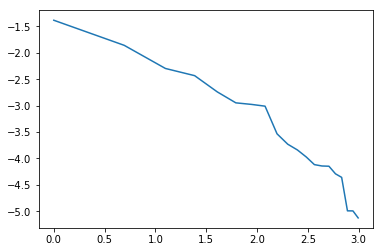

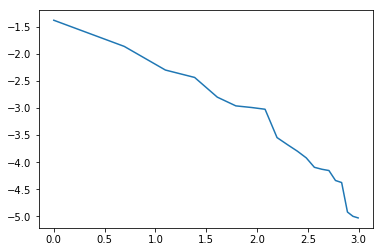

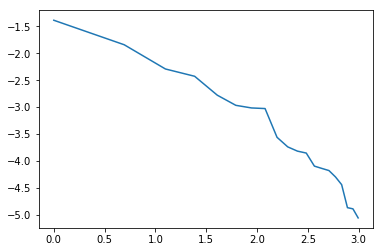

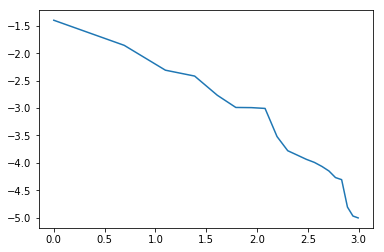

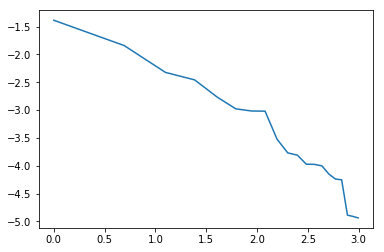

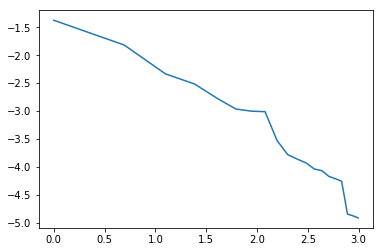

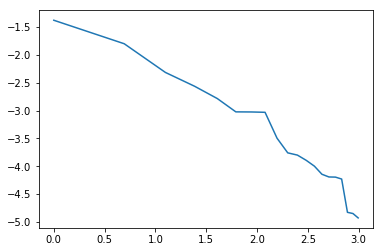

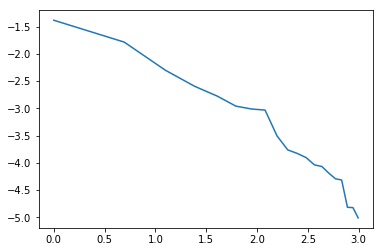

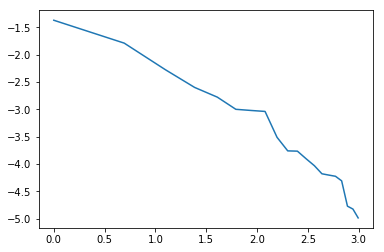

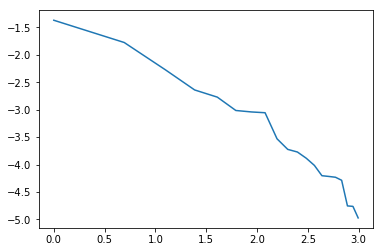

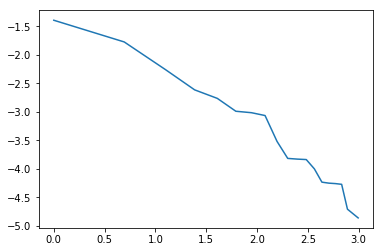

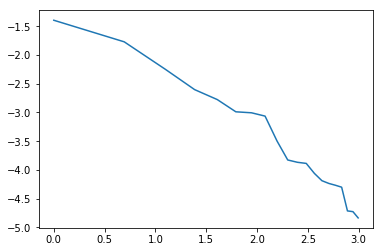

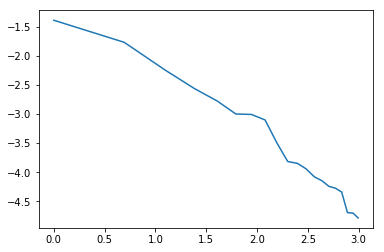

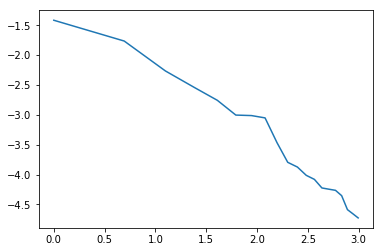

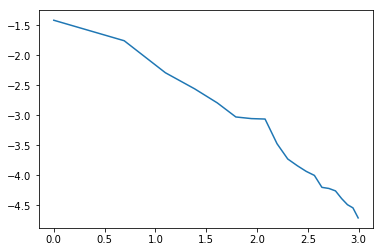

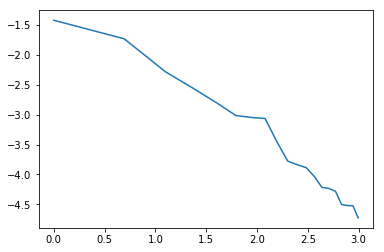

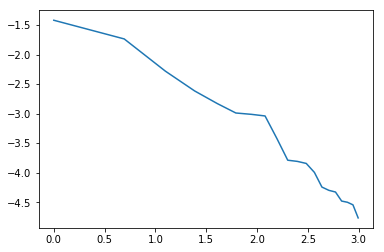

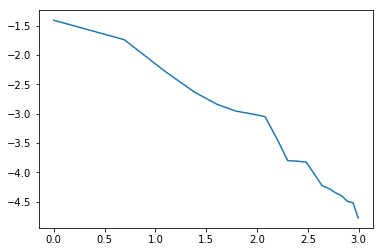

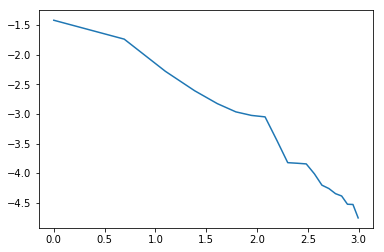

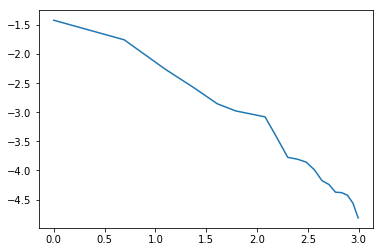

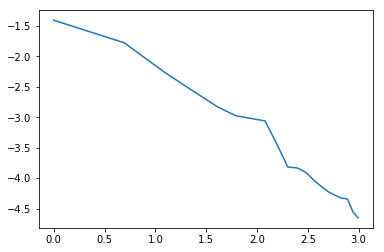

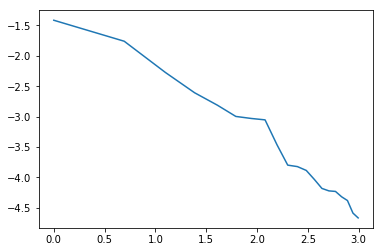

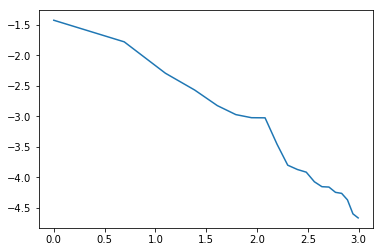

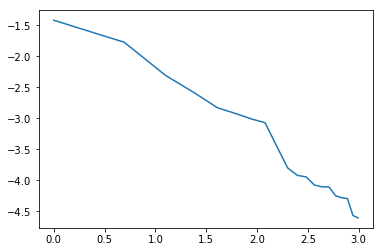

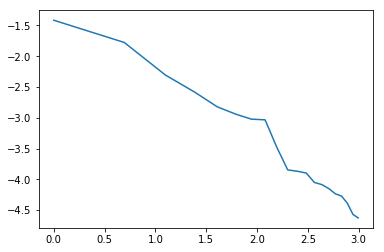

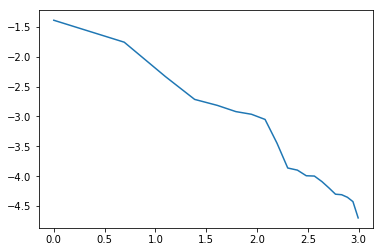

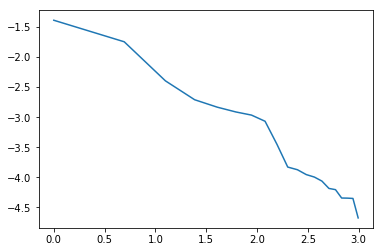

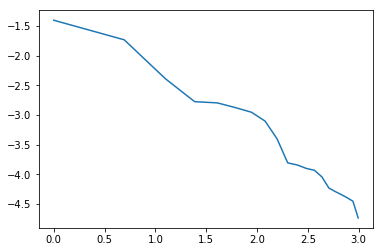

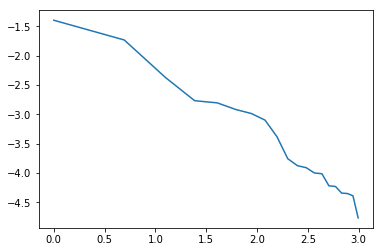

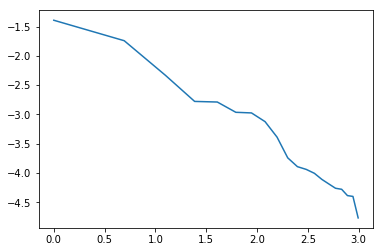

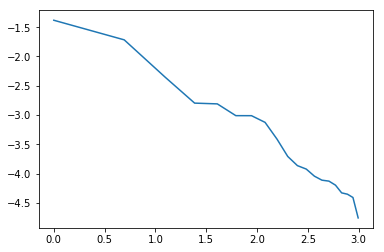

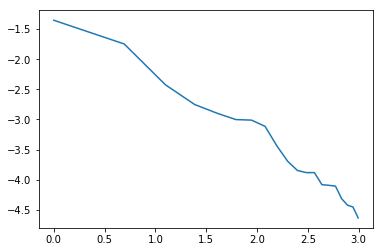

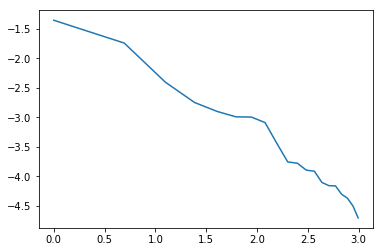

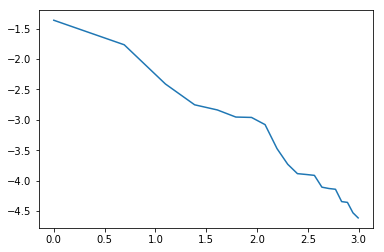

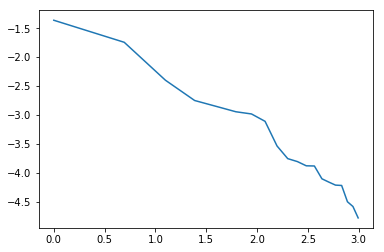

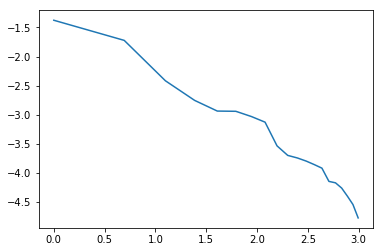

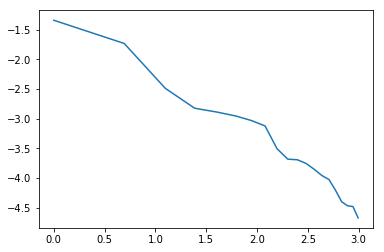

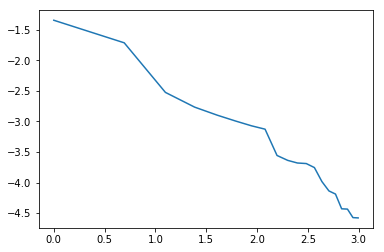

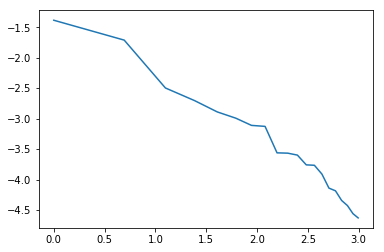

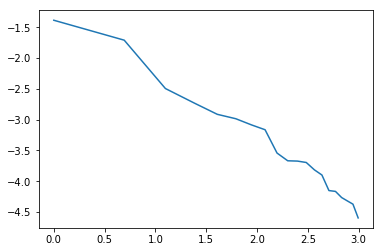

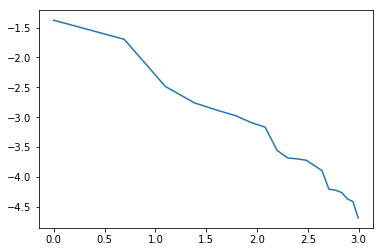

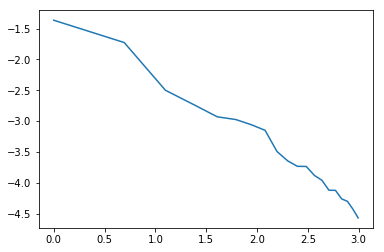

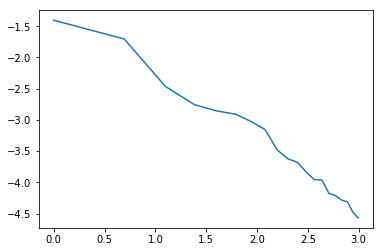

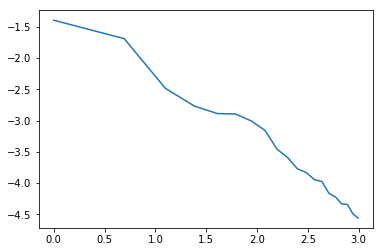

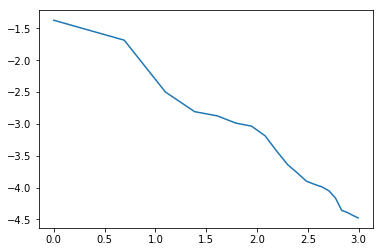

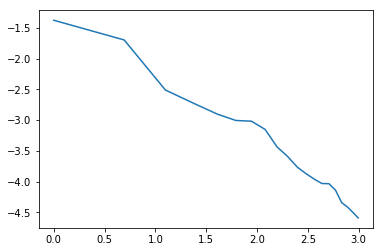

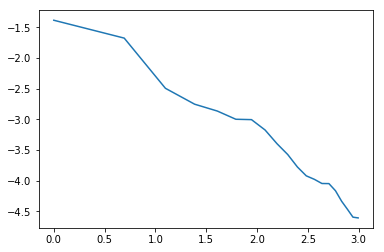

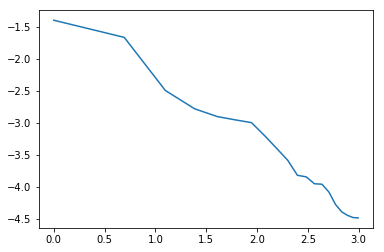

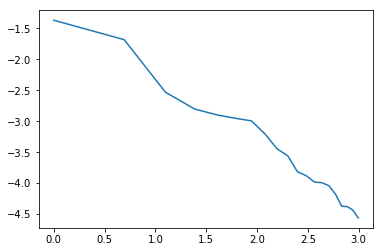

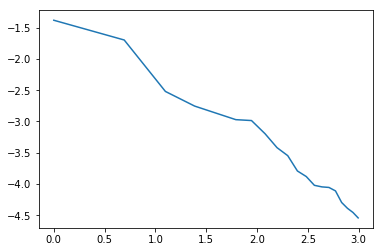

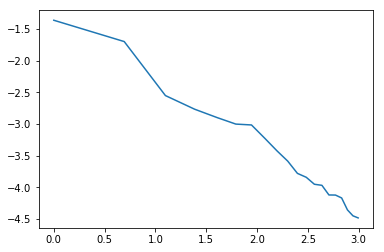

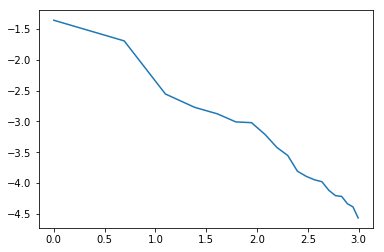

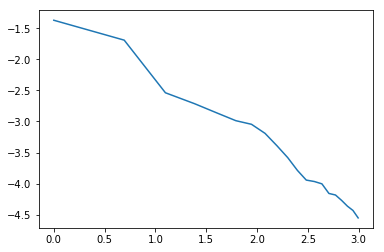

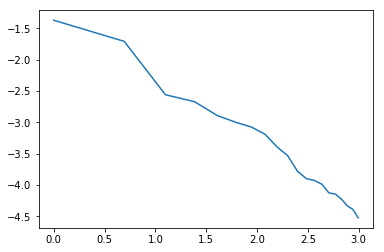

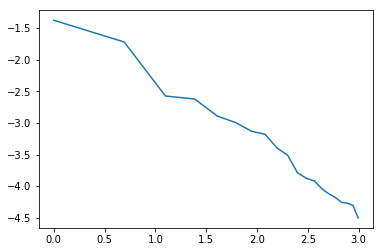

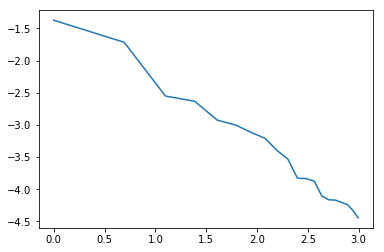

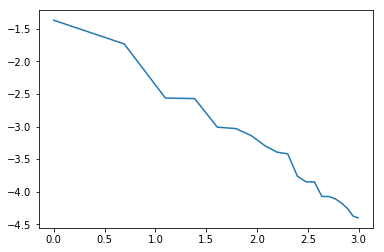

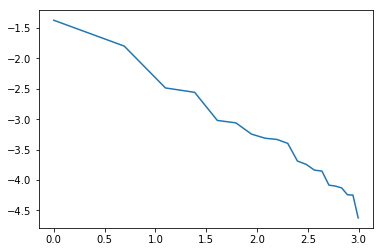

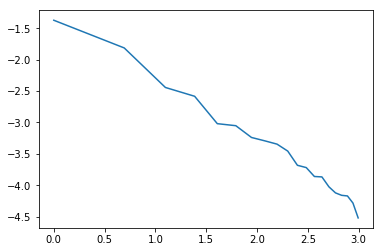

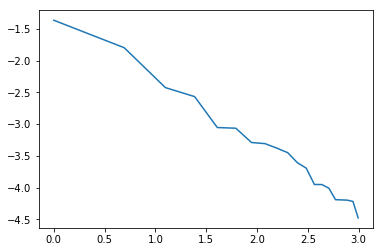

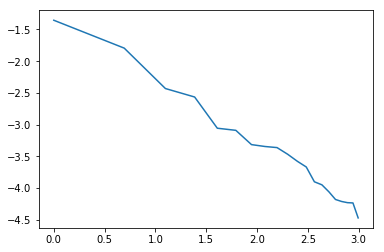

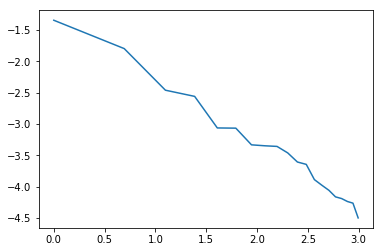

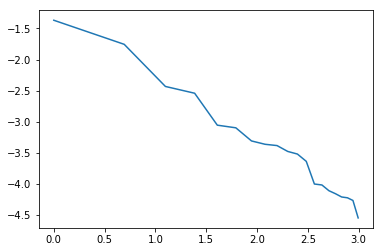

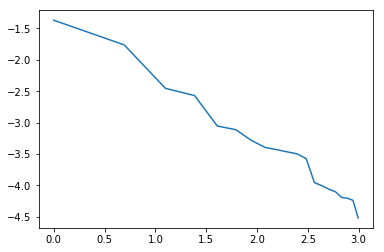

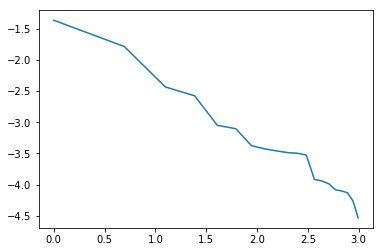

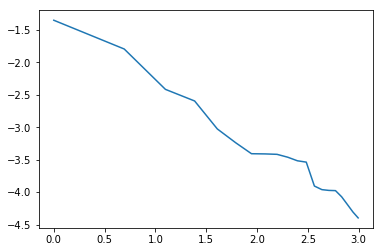

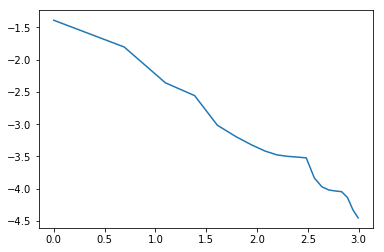

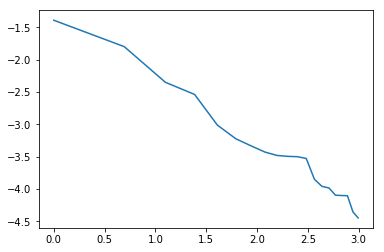

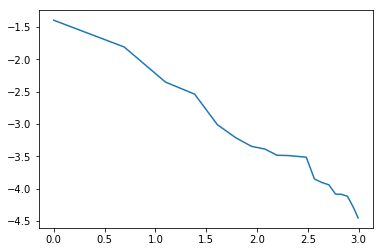

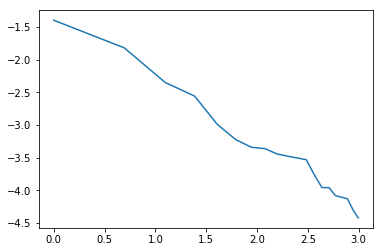

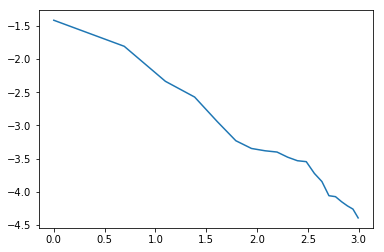

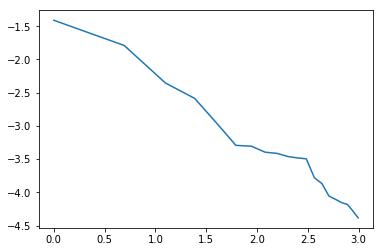

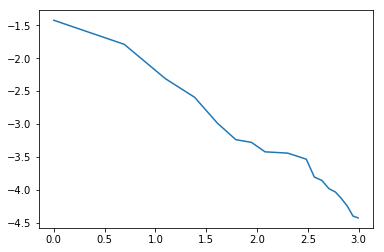

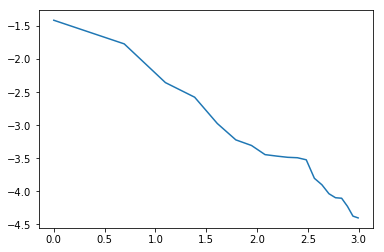

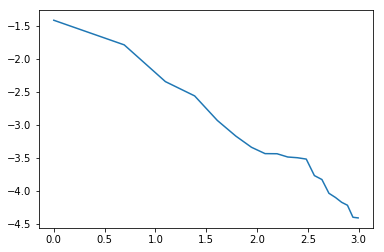

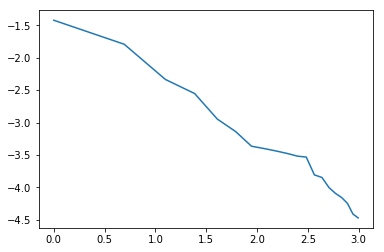

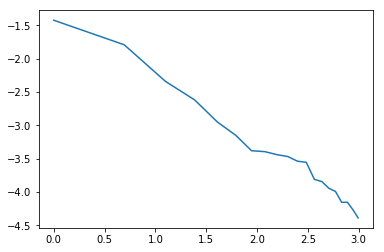

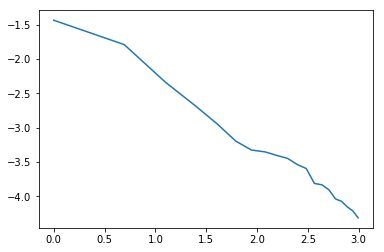

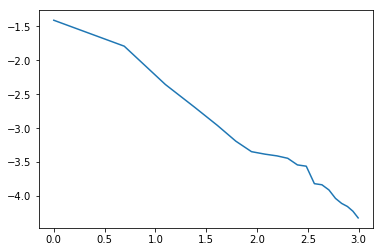

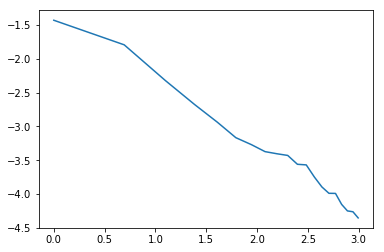

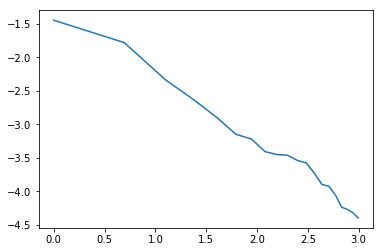

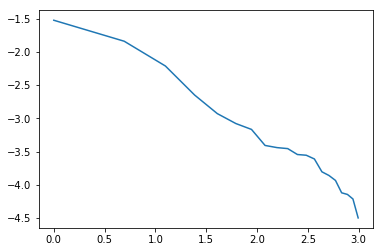

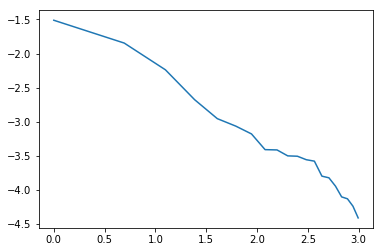

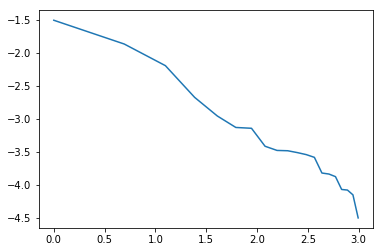

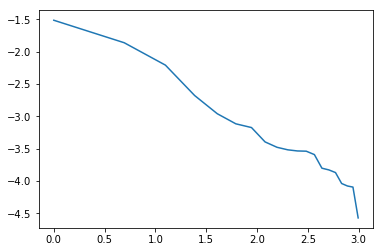

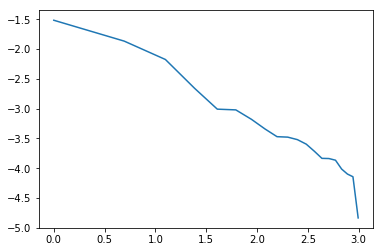

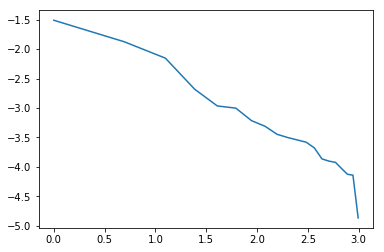

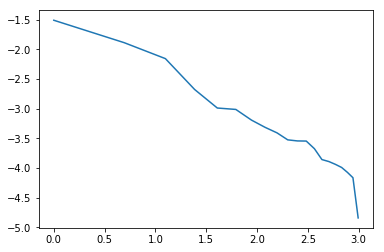

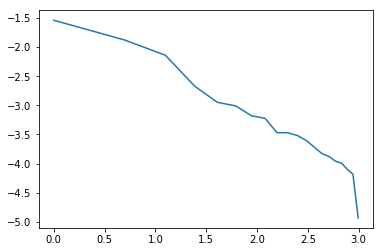

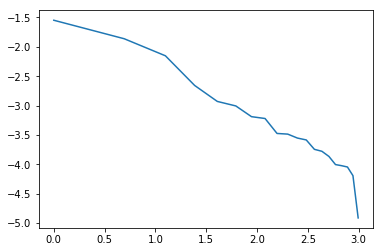

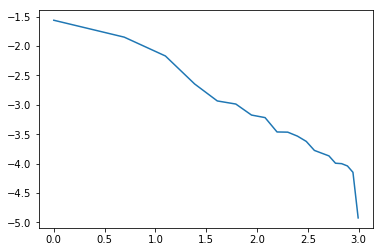

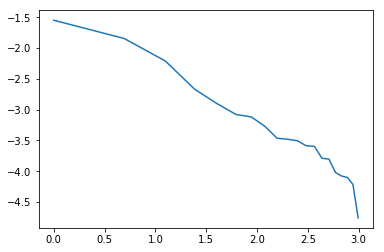

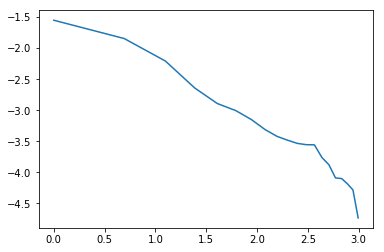

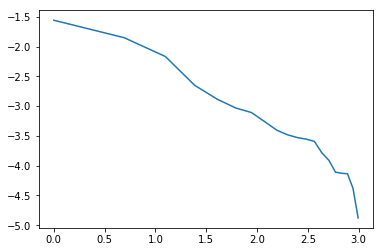

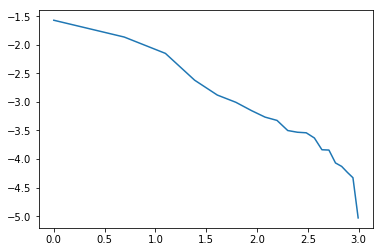

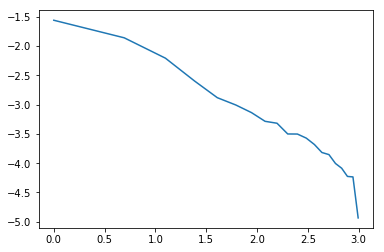

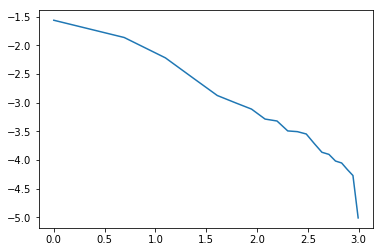

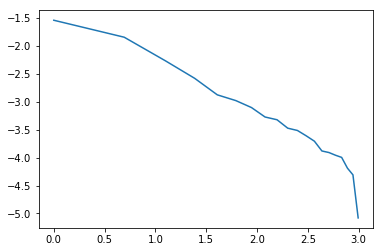

In [203]:
for i in range(N+1):
    plt.plot(np.log(np.linspace(1,n,num=n)),np.log(rankedmarketweights[i]))
    plt.show()

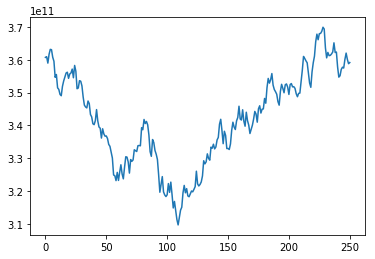

In [209]:
div=np.zeros(N+1)
for i in range(N+1):
    div[i]=np.sum(rankedmarketweights[i]**p)**(1/p)
plt.plot(div)
plt.show()

In [210]:
np.sum((1/n*np.ones(n))**p)**(1/p)

512000000000.00006